In [2]:
import sys
sys.path.append("/Users/carla/Desktop/GitHub/Projet-RNCP") 
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from src.utils.transformation import *
import matplotlib.pyplot as plt
import seaborn as sns

# Donn√©es r√©elles

In [3]:
df = pd.read_csv('database_clean.csv',parse_dates=['publishedAt','extractedAt'])
df = df.dropna(subset=['comment'])
df['comment_length'] = df['comment'].str.len()
#df.head(16)

In [3]:
df.shape

(1730, 9)

# Donn√©es d'entrainement

In [4]:
df_tweets = pd.read_csv('../data/french_tweets.csv') # les tweets
df_yt = pd.read_csv('/Users/carla/Downloads/partial_translation_1754895688.csv') # les commentaires youtube traduits en fran√ßais
df_alloc = pd.read_csv('/Users/carla/Desktop/GitHub/Projet-RNCP/data/test.csv') # les commentaires allocin√©

In [12]:
df_yt.head()

CommentID      VideoID  \
0  UgyRjrEdJIPrf68uND14AaABAg  mcY4M9gjtsI   
1  UgxXxEIySAwnMNw8D7N4AaABAg  2vuXcw9SZbA   
2  UgxB0jh2Ur41mcXr5IB4AaABAg  papg2tsoFzg   
3  UgwMOh95MfK0GuXLLrF4AaABAg  31KTdfRH6nY   
4  UgxJuUe5ysG8OSbABAl4AaABAg  -hV6aeyPHPA   

                                          VideoTitle              AuthorName  \
0        They killed my friend.#tales #movie #shorts         @OneWhoWandered   
1  Man Utd conceding first penalty at home in yea...           @chiefvon3068   
2                       Welcome to Javascript Course          @Abdulla-ip8qr   
3  Building web applications in Java with Spring ...        @finnianthehuman   
4  After a new engine her car dies on her way hom...  @ryoutubeplaylistb6137   

            AuthorChannelID  \
0  UC_-UEXaBL1dqqUPGkDll49A   
1  UCZ1LcZESjYqzaQRhjdZJFwg   
2  UCWBK35w5Swy1iF5xIbEyw3A   
3  UCwQ2Z03nOcMxWozBb_Cv66w   
4  UCTTcJ0tsAKQokmHB2qVb1qQ   

                                         CommentText Sentiment  Likes  \
0                    Anyone know what movie this is?   Neutral      0   
1  The fact they're holding each other back while...  Positive      0   
2                        waiting next video will be?   Neutral      1   
3  Thanks for the great video.\n\nI don't underst...   Neutral      0   
4  Good person helping good people.\nThis is how ...  Positive      3   

   Replies          PublishedAt CountryCode  CategoryID  \
0        2  2025-01-15 00:54:55          NZ           1   
1        0  2025-01-13 23:51:46          AU          17   
2        0  2020-07-06 13:18:16          IN          27   
3        1  2024-09-18 12:04:12          US          27   
4        1  2025-01-10 19:39:03          US           2   

                                             text_fr  
0                   Quelqu'un sait quel film c'est ?  
1  Le fait qu'ils se retiennent tout en √©tant aus...  
2                 Vous attendez la prochaine vid√©o ?  
3  Merci pour la grande vid√©o. Je ne comprends pa...  
4  C'est comme √ßa qu'on est en Am√©rique, √† l'exce...

In [4]:

# df_yt_fr = pd.read_csv('/Users/carla/Desktop/GitHub/Projet-RNCP/data/youtube_comments_cleaned.csv')
# df_yt_fr.groupby('VideoTitle')['CommentID'].count().reset_index().sort_values(by='CommentID', ascending=False)


In [9]:
# df_yt_fr[df_yt_fr['VideoID'] == 'Lzccd-ol1Ks'].head(10)
# # BTLcjQUued8Cc4qYw

# EDA

In [8]:
df_tweets.shape, df_yt.shape, df_alloc.shape

((1526724, 2), (25000, 13), (20000, 4))

In [9]:
df_tweets.info(), df_yt.info(), df_alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526724 entries, 0 to 1526723
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1526724 non-null  int64 
 1   text    1526724 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentID        25000 non-null  object
 1   VideoID          25000 non-null  object
 2   VideoTitle       25000 non-null  object
 3   AuthorName       24982 non-null  object
 4   AuthorChannelID  25000 non-null  object
 5   CommentText      25000 non-null  object
 6   Sentiment        25000 non-null  object
 7   Likes            25000 non-null  int64 
 8   Replies          25000 non-null  int64 
 9   PublishedAt      25000 non-null  object
 10  CountryCode      25000 non-null

(None, None, None)

In [10]:
# le nombre de commentaires (id) par vid√©o (videoid) en ordor d√©croissant du nombre de commentaires
df_yt.groupby('VideoID')['CommentID'].count().reset_index().sort_values(by='CommentID', ascending=False)


VideoID  CommentID
2159  TloMiwQv1x4         34
1603  Lzccd-ol1Ks         34
58    -hV6aeyPHPA         32
152   1DsMZuJm5Sg         31
121   0gASceRnltg         31
...           ...        ...
1500  KKgN_w71x3E          1
2907  dQlw1Cdd3pw          1
1486  K7ghUiXLef8          1
2913  dYrniSWkLAY          1
519   6k4N6pXx024          1

[4441 rows x 2 columns]

/var/folders/x7/nvdtqwsn1m31qvsf2ntlrwtw0000gn/T/ipykernel_4124/1426460490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=x, palette='viridis')


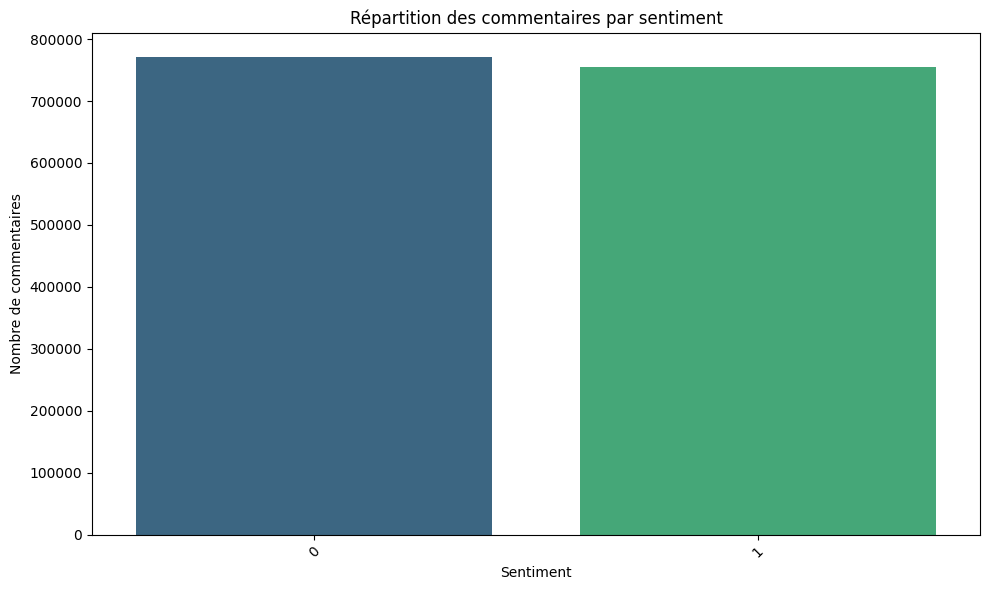

/var/folders/x7/nvdtqwsn1m31qvsf2ntlrwtw0000gn/T/ipykernel_4124/1426460490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=x, palette='viridis')


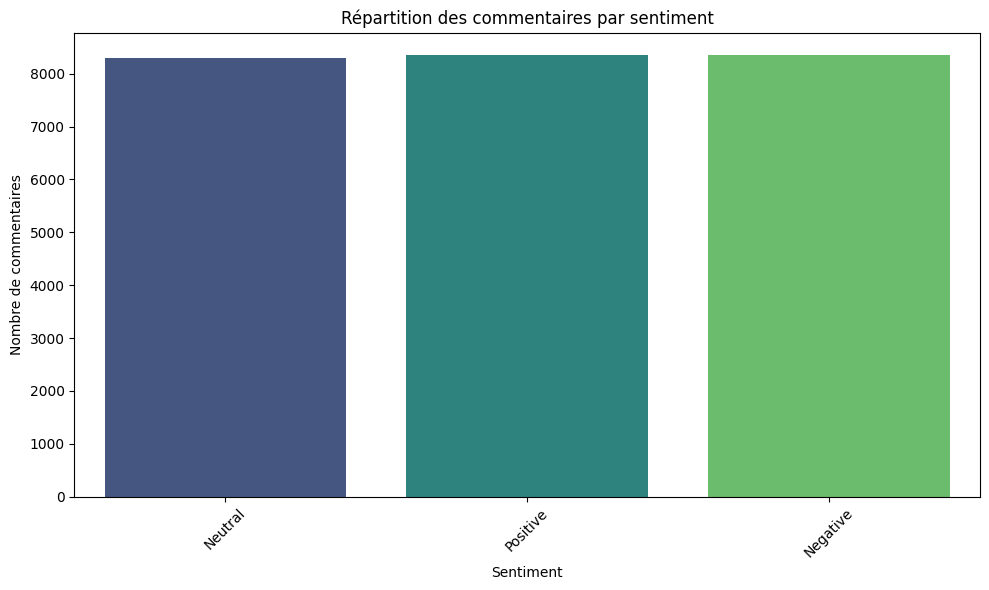

/var/folders/x7/nvdtqwsn1m31qvsf2ntlrwtw0000gn/T/ipykernel_4124/1426460490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=x, palette='viridis')


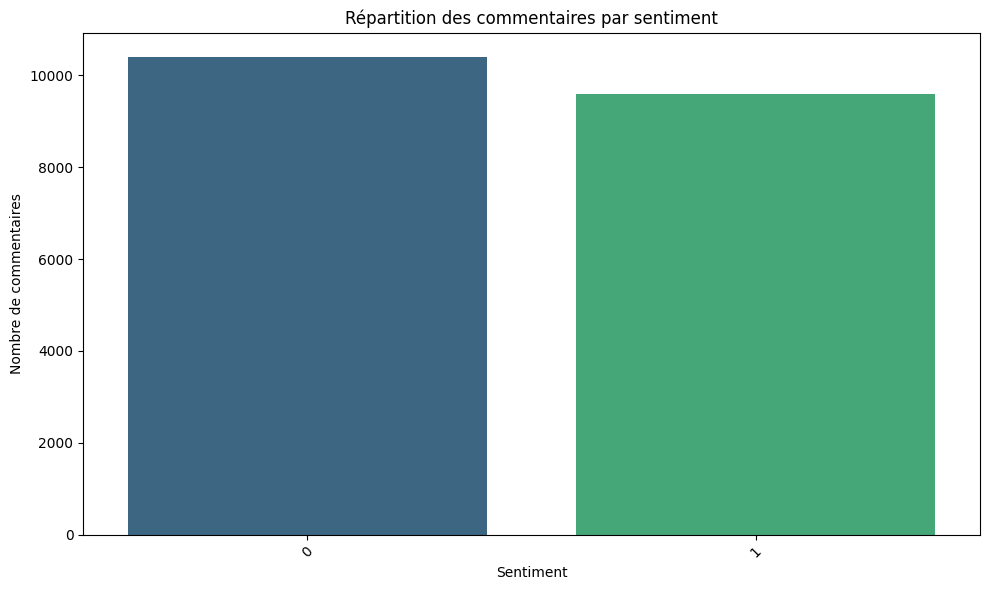

In [11]:
# graphique r√©partition des commentaires par sentiment
def plot_sentiment_distribution(df : pd.DataFrame, x :str) :
    """
    Affiche la r√©partition des sentiments dans le DataFrame.
    
    :param df: DataFrame contenant les sentiments
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=x, palette='viridis')
    plt.title('R√©partition des commentaires par sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Nombre de commentaires')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(df_tweets, 'label')

plot_sentiment_distribution(df_yt, 'Sentiment')

plot_sentiment_distribution(df_alloc, 'polarity')

In [12]:
from langdetect import detect
# filtre de data set sur les commentaires en anglais
def safe_detect(text):
    try:
        return detect(text.strip()) if isinstance(text, str) and text.strip() else None
    except Exception as e:
        return None  # Return None if detection fails


# ANALYSE DE SIMILARIT√â

In [13]:
from scipy.stats import mannwhitneyu
dataset_lengths = [len(text.split()) for text in df_tweets['text']]
youtube_lengths = [len(text.split()) for text in df['comment']]

# Test Mann-Whitney U
stat, pvalue = mannwhitneyu(dataset_lengths, youtube_lengths, alternative='two-sided')

# Effect size (r de Rosenthal)
n = len(dataset_lengths) + len(youtube_lengths)
z_score = (stat - len(dataset_lengths) * len(youtube_lengths) / 2) / np.sqrt(len(dataset_lengths) * len(youtube_lengths) * n / 12)
effect_size = abs(z_score) / np.sqrt(n)

def get_vocab(texts):
        """Extrait le vocabulaire unique (mots en minuscules, sans ponctuation)"""
        vocab = set()
        for text in texts:
            words = re.findall(r'\b\w+\b', text.lower())
            vocab.update(words)
        return vocab

dataset_vocab = get_vocab(df_tweets['text'])
youtube_vocab = get_vocab(df['comment'])

# Jaccard Index
intersection = len(dataset_vocab.intersection(youtube_vocab))
union = len(dataset_vocab.union(youtube_vocab))
jaccard = intersection / union if union > 0 else 0

# Coverage bidirectionnel
coverage_to_yt = intersection / len(dataset_vocab) if len(dataset_vocab) > 0 else 0
coverage_from_yt = intersection / len(youtube_vocab) if len(youtube_vocab) > 0 else 0

from sklearn.metrics.pairwise import cosine_similarity
min_size = min(len(df_tweets['text']), len(df['comment']), 1000)  # Max 1000 pour performance

np.random.seed(42)  # Reproductibilit√©
dataset_sample = np.random.choice(df_tweets['text'], min_size, replace=False).tolist()
youtube_sample = np.random.choice(df['comment'], min_size, replace=False).tolist()

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None, lowercase=True)
all_texts = dataset_sample + youtube_sample
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Vecteurs moyens
dataset_tfidf = tfidf_matrix[:min_size].mean(axis=0)
youtube_tfidf = tfidf_matrix[min_size:].mean(axis=0)
dataset_tfidf = np.asarray(dataset_tfidf)
youtube_tfidf = np.asarray(youtube_tfidf)

# Similarit√© cosinus
tfidf_cosine = cosine_similarity(dataset_tfidf, youtube_tfidf)[0, 0]

# ========== SCORE COMPOSITE ==========
# Pond√©ration : coverage_from_yt le plus important pour les performances
composite_score = (
    jaccard * 0.25 +
    coverage_to_yt * 0.2 +
    coverage_from_yt * 0.35 +
    tfidf_cosine * 0.2
)

{
        # Longueurs
        'length_pvalue': pvalue,
        'length_effect_size': effect_size,
        'length_similar': pvalue > 0.05 or effect_size < 0.3,
        
        # Vocabulaire
        'jaccard': round(jaccard, 3),
        'coverage_to_yt': round(coverage_to_yt, 3),
        'coverage_from_yt': round(coverage_from_yt, 3),
        'tfidf_cosine': round(tfidf_cosine, 3),
        
        # Score final
        'composite_score': round(composite_score, 3),
        
        # Statistiques descriptives
        'dataset_vocab_size': len(dataset_vocab),
        'youtube_vocab_size': len(youtube_vocab),
        'common_words': intersection,
        'dataset_avg_length': round(np.mean(dataset_lengths), 1),
        'youtube_avg_length': round(np.mean(youtube_lengths), 1)
    }

{'length_pvalue': 0.0627231978668098,
 'length_effect_size': 0.0015042652996436574,
 'length_similar': True,
 'jaccard': 0.015,
 'coverage_to_yt': 0.015,
 'coverage_from_yt': 0.849,
 'tfidf_cosine': 0.676,
 'composite_score': 0.439,
 'dataset_vocab_size': 253124,
 'youtube_vocab_size': 4552,
 'common_words': 3864,
 'dataset_avg_length': 14.1,
 'youtube_avg_length': 17.8}

In [14]:
from scipy.stats import mannwhitneyu
dataset_lengths = [len(text.split()) for text in df_alloc['review']]
youtube_lengths = [len(text.split()) for text in df['comment']]

# Test Mann-Whitney U
stat, pvalue = mannwhitneyu(dataset_lengths, youtube_lengths, alternative='two-sided')

# Effect size (r de Rosenthal)
n = len(dataset_lengths) + len(youtube_lengths)
z_score = (stat - len(dataset_lengths) * len(youtube_lengths) / 2) / np.sqrt(len(dataset_lengths) * len(youtube_lengths) * n / 12)
effect_size = abs(z_score) / np.sqrt(n)

def get_vocab(texts):
        """Extrait le vocabulaire unique (mots en minuscules, sans ponctuation)"""
        vocab = set()
        for text in texts:
            words = re.findall(r'\b\w+\b', text.lower())
            vocab.update(words)
        return vocab

dataset_vocab = get_vocab(df_alloc['review'])
youtube_vocab = get_vocab(df['comment'])

# Jaccard Index
intersection = len(dataset_vocab.intersection(youtube_vocab))
union = len(dataset_vocab.union(youtube_vocab))
jaccard = intersection / union if union > 0 else 0

# Coverage bidirectionnel
coverage_to_yt = intersection / len(dataset_vocab) if len(dataset_vocab) > 0 else 0
coverage_from_yt = intersection / len(youtube_vocab) if len(youtube_vocab) > 0 else 0

from sklearn.metrics.pairwise import cosine_similarity
min_size = min(len(df_alloc['review']), len(df['comment']), 1000)  # Max 1000 pour performance

np.random.seed(42)  # Reproductibilit√©
dataset_sample = np.random.choice(df_alloc['review'], min_size, replace=False).tolist()
youtube_sample = np.random.choice(df['comment'], min_size, replace=False).tolist()

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None, lowercase=True)
all_texts = dataset_sample + youtube_sample
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Vecteurs moyens
dataset_tfidf = tfidf_matrix[:min_size].mean(axis=0)
youtube_tfidf = tfidf_matrix[min_size:].mean(axis=0)
dataset_tfidf = np.asarray(dataset_tfidf)
youtube_tfidf = np.asarray(youtube_tfidf)

# Similarit√© cosinus
tfidf_cosine = cosine_similarity(dataset_tfidf, youtube_tfidf)[0, 0]

# ========== SCORE COMPOSITE ==========
# Pond√©ration : coverage_from_yt le plus important pour les performances
composite_score = (
    jaccard * 0.25 +
    coverage_to_yt * 0.2 +
    coverage_from_yt * 0.35 +
    tfidf_cosine * 0.2
)

{
        # Longueurs
        'length_pvalue': pvalue,
        'length_effect_size': effect_size,
        'length_similar': pvalue > 0.05 or effect_size < 0.3,
        
        # Vocabulaire
        'jaccard': round(jaccard, 3),
        'coverage_to_yt': round(coverage_to_yt, 3),
        'coverage_from_yt': round(coverage_from_yt, 3),
        'tfidf_cosine': round(tfidf_cosine, 3),
        
        # Score final
        'composite_score': round(composite_score, 3),
        
        # Statistiques descriptives
        'dataset_vocab_size': len(dataset_vocab),
        'youtube_vocab_size': len(youtube_vocab),
        'common_words': intersection,
        'dataset_avg_length': round(np.mean(dataset_lengths), 1),
        'youtube_avg_length': round(np.mean(youtube_lengths), 1)
    }

{'length_pvalue': 0.0,
 'length_effect_size': 0.38080508517052697,
 'length_similar': False,
 'jaccard': 0.061,
 'coverage_to_yt': 0.062,
 'coverage_from_yt': 0.78,
 'tfidf_cosine': 0.639,
 'composite_score': 0.429,
 'dataset_vocab_size': 57023,
 'youtube_vocab_size': 4552,
 'common_words': 3552,
 'dataset_avg_length': 92.5,
 'youtube_avg_length': 17.8}

In [15]:
from scipy.stats import mannwhitneyu
dataset_lengths = [len(text.split()) for text in df_yt['text_fr']]
youtube_lengths = [len(text.split()) for text in df['comment']]

# Test Mann-Whitney U
stat, pvalue = mannwhitneyu(dataset_lengths, youtube_lengths, alternative='two-sided')

# Effect size (r de Rosenthal)
n = len(dataset_lengths) + len(youtube_lengths)
z_score = (stat - len(dataset_lengths) * len(youtube_lengths) / 2) / np.sqrt(len(dataset_lengths) * len(youtube_lengths) * n / 12)
effect_size = abs(z_score) / np.sqrt(n)

def get_vocab(texts):
        """Extrait le vocabulaire unique (mots en minuscules, sans ponctuation)"""
        vocab = set()
        for text in texts:
            words = re.findall(r'\b\w+\b', text.lower())
            vocab.update(words)
        return vocab

dataset_vocab = get_vocab(df_yt['text_fr'])
youtube_vocab = get_vocab(df['comment'])

# Jaccard Index
intersection = len(dataset_vocab.intersection(youtube_vocab))
union = len(dataset_vocab.union(youtube_vocab))
jaccard = intersection / union if union > 0 else 0

# Coverage bidirectionnel
coverage_to_yt = intersection / len(dataset_vocab) if len(dataset_vocab) > 0 else 0
coverage_from_yt = intersection / len(youtube_vocab) if len(youtube_vocab) > 0 else 0

from sklearn.metrics.pairwise import cosine_similarity
min_size = min(len(df_yt['text_fr']), len(df['comment']), 1000)  # Max 1000 pour performance

np.random.seed(42)  # Reproductibilit√©
dataset_sample = np.random.choice(df_yt['text_fr'], min_size, replace=False).tolist()
youtube_sample = np.random.choice(df['comment'], min_size, replace=False).tolist()

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None, lowercase=True)
all_texts = dataset_sample + youtube_sample
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Vecteurs moyens
dataset_tfidf = tfidf_matrix[:min_size].mean(axis=0)
youtube_tfidf = tfidf_matrix[min_size:].mean(axis=0)
dataset_tfidf = np.asarray(dataset_tfidf)
youtube_tfidf = np.asarray(youtube_tfidf)

# Similarit√© cosinus
tfidf_cosine = cosine_similarity(dataset_tfidf, youtube_tfidf)[0, 0]

# ========== SCORE COMPOSITE ==========
# Pond√©ration : coverage_from_yt le plus important pour les performances
composite_score = (
    jaccard * 0.25 +
    coverage_to_yt * 0.2 +
    coverage_from_yt * 0.35 +
    tfidf_cosine * 0.2
)

{
        # Longueurs
        'length_pvalue': pvalue,
        'length_effect_size': effect_size,
        'length_similar': pvalue > 0.05 or effect_size < 0.3,
        
        # Vocabulaire
        'jaccard': round(jaccard, 3),
        'coverage_to_yt': round(coverage_to_yt, 3),
        'coverage_from_yt': round(coverage_from_yt, 3),
        'tfidf_cosine': round(tfidf_cosine, 3),
        
        # Score final
        'composite_score': round(composite_score, 3),
        
        # Statistiques descriptives
        'dataset_vocab_size': len(dataset_vocab),
        'youtube_vocab_size': len(youtube_vocab),
        'common_words': intersection,
        'dataset_avg_length': round(np.mean(dataset_lengths), 1),
        'youtube_avg_length': round(np.mean(youtube_lengths), 1)
    }

{'length_pvalue': 0.27747154618981473,
 'length_effect_size': 0.0066388252969118945,
 'length_similar': True,
 'jaccard': 0.085,
 'coverage_to_yt': 0.089,
 'coverage_from_yt': 0.651,
 'tfidf_cosine': 0.746,
 'composite_score': 0.416,
 'dataset_vocab_size': 33469,
 'youtube_vocab_size': 4552,
 'common_words': 2963,
 'dataset_avg_length': 18.4,
 'youtube_avg_length': 17.8}

# classification

In [10]:
# df_fr = main_transformation(df_yt, 'text_fr','/Users/carla/Desktop/GitHub/Projet-RNCP/extra_expressions.txt')
# df_fr.head()

In [5]:
# precpocessing 
from src.utils.transformation import preprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer


path = '/Users/carla/Desktop/GitHub/Projet-RNCP/extra_expressions.txt'
df_yt['tokens_clean_lem'] = df_yt['text_fr'].apply(lambda x: preprocessing(x, join=False, path=path))
df_yt['comment_clean_lem'] = df_yt['text_fr'].astype(str).apply(lambda x: preprocessing(x, join=True, path=path))

# vectorisation 
## w2vec
# Exemple de corpus
sentences = df_yt['comment_clean_lem'].dropna().tolist()
tokenized_sentences = [simple_preprocess(sent) for sent in sentences]

model_w2v = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)
def get_sentence_vector(sentence, model):
    if pd.isna(sentence):  # Gestion des valeurs NaN
        return np.zeros(model.vector_size)
    words = simple_preprocess(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)  # moyenne des vecteurs
    else:
        return np.zeros(model.vector_size)
    
df_yt['w2vec_vector'] = df_yt['comment_clean_lem'].apply(lambda x: get_sentence_vector(x, model_w2v))

## tfidf
# Exemple de corpus
corpus = df_yt['text_fr'].dropna().tolist()  # Assurez-vous que les commentaires ne sont pas vides
# Initialisation du vecteur TF-IDF
vectorizer = TfidfVectorizer()
# Entra√Ænement du mod√®le TF-IDF
tfidf_matrix = vectorizer.fit_transform(corpus)
# ajouter une colonne avec les vecteurs TF-IDF
df_yt['tfidf_vector'] = list(tfidf_matrix.toarray())

In [16]:
df_yt.head()

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


CommentID      VideoID  \
0  UgyRjrEdJIPrf68uND14AaABAg  mcY4M9gjtsI   
1  UgxXxEIySAwnMNw8D7N4AaABAg  2vuXcw9SZbA   
2  UgxB0jh2Ur41mcXr5IB4AaABAg  papg2tsoFzg   
3  UgwMOh95MfK0GuXLLrF4AaABAg  31KTdfRH6nY   
4  UgxJuUe5ysG8OSbABAl4AaABAg  -hV6aeyPHPA   

                                          VideoTitle              AuthorName  \
0        They killed my friend.#tales #movie #shorts         @OneWhoWandered   
1  Man Utd conceding first penalty at home in yea...           @chiefvon3068   
2                       Welcome to Javascript Course          @Abdulla-ip8qr   
3  Building web applications in Java with Spring ...        @finnianthehuman   
4  After a new engine her car dies on her way hom...  @ryoutubeplaylistb6137   

            AuthorChannelID  \
0  UC_-UEXaBL1dqqUPGkDll49A   
1  UCZ1LcZESjYqzaQRhjdZJFwg   
2  UCWBK35w5Swy1iF5xIbEyw3A   
3  UCwQ2Z03nOcMxWozBb_Cv66w   
4  UCTTcJ0tsAKQokmHB2qVb1qQ   

                                         CommentText Sentiment  Likes  \
0                    Anyone know what movie this is?   Neutral      0   
1  The fact they're holding each other back while...  Positive      0   
2                        waiting next video will be?   Neutral      1   
3  Thanks for the great video.\n\nI don't underst...   Neutral      0   
4  Good person helping good people.\nThis is how ...  Positive      3   

   Replies          PublishedAt CountryCode  CategoryID  \
0        2  2025-01-15 00:54:55          NZ           1   
1        0  2025-01-13 23:51:46          AU          17   
2        0  2020-07-06 13:18:16          IN          27   
3        1  2024-09-18 12:04:12          US          27   
4        1  2025-01-10 19:39:03          US           2   

                                             text_fr  \
0                   Quelqu'un sait quel film c'est ?   
1  Le fait qu'ils se retiennent tout en √©tant aus...   
2                 Vous attendez la prochaine vid√©o ?   
3  Merci pour la grande vid√©o. Je ne comprends pa...   
4  C'est comme √ßa qu'on est en Am√©rique, √† l'exce...   

                                    tokens_clean_lem  \
0                                    [quelque, film]   
1                                [retenir, agressif]   
2                        [attendre, prochain, video]   
3  [grand, video, comprendre, continuer, accessib...   
4                        [amerique, exception, york]   

                                   comment_clean_lem  \
0                                       quelque film   
1                                   retenir agressif   
2                            attendre prochain video   
3  grand video comprendre continuer accessible po...   
4                            amerique exception york   

                                        w2vec_vector  \
0  [-0.11235532, -0.037710413, 0.074255876, 0.038...   
1  [-0.1205232, -0.016404409, 0.13283269, 0.03360...   
2  [-0.00061327295, -0.109760165, 0.16613908, -0....   
3  [-0.12810324, -0.12702976, 0.12918694, 0.00576...   
4  [-0.18567802, 0.030711269, 0.11393711, -0.0344...   

                                        tfidf_vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [4]:
# # vectorisation du texte
# from gensim.models import Word2Vec
# from gensim.utils import simple_preprocess

# # text_fr = pd.read_csv("../data/youtube_comments_fr_translated_marian.csv")

# # Exemple de corpus
# sentences = df_train2['comment_clean_lem'].dropna().tolist()  # Assurez-vous que les commentaires ne sont pas vides

# # Pr√©traitement (tokenisation simple)
# tokenized_sentences = [simple_preprocess(sent) for sent in sentences]

# # Entra√Ænement Word2Vec (skip-gram)
# model_w2v = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)

# # # Exemple : obtenir le vecteur pour le mot 'apprendre'
# # # vector_apprendre = model_w2v.wv['apprendre']
# # # print(f"Vector for 'apprendre' (Word2Vec):\n{vector_apprendre}")

# # # Trouver mots similaires
# # # similaires = model_w2v.wv.most_similar('apprendre', topn=3)
# # # print("Mots les plus similaires √† 'apprendre' :", similaires)


In [11]:
# import inspect
# import sys
# import importlib

# module_name = "src.utils.transformation"

# # Remove the module from the cache
# if module_name in sys.modules:
#     del sys.modules[module_name]

# # Import and reload the module
# from src.utils.transformation import * 

# inspect.signature(main_transformation).parameters

In [255]:
# def get_sentence_vector(sentence, model):
#     words = simple_preprocess(sentence)
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)  # moyenne des vecteurs
#     else:
#         return np.zeros(model.vector_size)
    
# df_fr['w2vec_vector'] = df_fr['comment_clean_lem'].apply(lambda x: get_sentence_vector(x, model_w2v))

In [6]:
# # vectorisation tfidf
# from sklearn.feature_extraction.text import TfidfVectorizer
# # Exemple de corpus
# corpus = df_train2['text_fr'].dropna().tolist()  # Assurez-vous que les commentaires ne sont pas vides
# # Initialisation du vecteur TF-IDF
# vectorizer = TfidfVectorizer()
# # Entra√Ænement du mod√®le TF-IDF
# tfidf_matrix = vectorizer.fit_transform(corpus)
# # ajouter une colonne avec les vecteurs TF-IDF
# df_fr['tfidf_vector'] = list(tfidf_matrix.toarray())

# # def get_tfidf_vector(df, text='comment_clean_lem'):
# #     """
# #     Obtenir le vecteur TF-IDF d'une phrase
# #     """
# #     vectorizer = TfidfVectorizer()
# #     corpus = df[text].dropna().tolist()
# #     tfidf_matrix = vectorizer.fit_transform(corpus)
# #     df['tfidf_vector'] = list(tfidf_matrix.toarray())
# #     return df


In [11]:
# # ajouter une colonne avec le texte vectoriser
# df_fr['vector'] = df_fr['comment_clean_lem'].apply(lambda x: model_w2v.wv[simple_preprocess(x)] if pd.notnull(x) else None)
# df_fr.head(10)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_yt['Sentiment'].values)
label_encoder.classes_
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
x_knn = np.array(df_yt['w2vec_vector'].tolist())
x = np.array(df_yt['tfidf_vector'].tolist())
w = np.array(df_yt['text_fr'].tolist())


x_train, x_test, x_knn_train, x_knn_test, y_train, y_test , w_train, w_test = train_test_split(x, x_knn, y, w, test_size=0.2, random_state=42)
print(f"Train set size: {len(x_train)}, Test set size: {len(x_test)}")
print(f"les shapes des donn√©es d'entra√Ænement et de test: {x_train.shape}, {x_test.shape}")
print(f"les shapes des labels d'entra√Ænement et de test: {y_train.shape}, {y_test.shape}")
print(f"les shapes des texts d'entra√Ænement et de test: {w_train.shape}, {w_test.shape}")
print(f"les shapes des vecteurs d'entra√Ænement et de test: {x_knn_train.shape}, {x_knn_test.shape}")
print(label_encoder.classes_)


Train set size: 20000, Test set size: 5000
les shapes des donn√©es d'entra√Ænement et de test: (20000, 33396), (5000, 33396)
les shapes des labels d'entra√Ænement et de test: (20000,), (5000,)
les shapes des texts d'entra√Ænement et de test: (20000,), (5000,)
les shapes des vecteurs d'entra√Ænement et de test: (20000, 100), (5000, 100)
['Negative' 'Neutral' 'Positive']


In [6]:
accuracy =[]
fscores = []

print("Entra√Ænement des mod√®les de classification...")

# Entra√Ænement du mod√®le Random Forest
rf= RandomForestClassifier(n_estimators=100, random_state=42)
# entraienellement du mod√®le arbre de d√©cision
dt = DecisionTreeClassifier(random_state=42)
# entraienellement du mod√®le SVM
svm = SVC(kernel='linear', random_state=42)
# entraienellement du mod√®le r√©gression logistique
lr = LogisticRegression(max_iter=1000, random_state=42)
# entraienellement du mod√®le KNN
knn = KNeighborsClassifier(n_neighbors=5)
# entraienellement du mod√®le Naive Bayes
nb = MultinomialNB()

print("Entra√Ænement du mod√®le Random Forest...")
rf.fit(x_train, y_train)
# Pr√©dictions sur l'ensemble de test
y_pred_rf = rf.predict(x_test)
# √âvaluation du mod√®le
from sklearn.metrics import classification_report, accuracy_score
print(f"Classification Report\n:{classification_report(y_test, y_pred_rf)}")
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", {acc_rf})
accuracy.append(acc_rf)
fscore_rf = f1_score(y_test, y_pred_rf, average='weighted')
fscores.append(fscore_rf)
print("F1 Score:", fscore_rf)


print("Entra√Ænement du mod√®le Arbre de D√©cision...")
dt.fit(x_train, y_train)
# Pr√©dictions sur l'ensemble de test
y_pred_dt = dt.predict(x_test)
# √âvaluation du mod√®le
print(f"Classification Report\n:{classification_report(y_test, y_pred_dt)}")
acc_dt = accuracy_score(y_test, y_pred_dt)
accuracy.append(acc_dt)
print("Accuracy:", acc_dt)
fscore_dt = f1_score(y_test, y_pred_dt, average='weighted')
fscores.append(fscore_dt)
print("F1 Score:", fscore_dt)

print("Entra√Ænement du mod√®le SVM...")
svm.fit(x_train, y_train)
# Pr√©dictions sur l'ensemble de test
y_pred_svm = svm.predict(x_test)
# √âvaluation du mod√®le
print(f"Classification Report\n:{classification_report(y_test, y_pred_svm)}")
acc_svm = accuracy_score(y_test, y_pred_svm)
accuracy.append(acc_svm)
print("Accuracy:", acc_svm)
fscore_svm = f1_score(y_test, y_pred_svm, average='weighted')
fscores.append(fscore_svm)
print("F1 Score:", fscore_svm)

print("Entra√Ænement du mod√®le Regression logistique...")
lr.fit(x_train, y_train)
# Pr√©dictions sur l'ensemble de test
y_pred_lr = lr.predict(x_test)
# √âvaluation du mod√®le
print(f"Classification Report\n:{classification_report(y_test, y_pred_lr)}")
acc_lr = accuracy_score(y_test, y_pred_lr)
accuracy.append(acc_lr)
print("Accuracy:", acc_lr)
fscore_lr = f1_score(y_test, y_pred_lr, average='weighted')
fscores.append(fscore_lr)
print("F1 Score:", fscore_lr)

print("Entra√Ænement du mod√®le KNN...")
knn.fit(x_knn_train, y_train)
# Pr√©dictions sur l'ensemble de test
y_pred_knn = knn.predict(x_knn_test)
# √âvaluation du mod√®le
print(f"Classification Report\n:{classification_report(y_test, y_pred_knn)}")
acc_knn = accuracy_score(y_test, y_pred_knn)
accuracy.append(acc_knn)
print("Accuracy:", acc_knn)
fscore_knn = f1_score(y_test, y_pred_knn, average='weighted')
fscores.append(fscore_knn)
print("F1 Score:", fscore_knn)


Entra√Ænement des mod√®les de classification...
Entra√Ænement du mod√®le Random Forest...
Classification Report
:              precision    recall  f1-score   support

           0       0.50      0.59      0.54      1707
           1       0.51      0.48      0.49      1684
           2       0.59      0.51      0.55      1609

    accuracy                           0.53      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.53      0.53      0.53      5000

Accuracy: {0.528}
F1 Score: 0.5277132770583683
Entra√Ænement du mod√®le Arbre de D√©cision...
Classification Report
:              precision    recall  f1-score   support

           0       0.44      0.41      0.42      1707
           1       0.42      0.44      0.43      1684
           2       0.47      0.47      0.47      1609

    accuracy                           0.44      5000
   macro avg       0.44      0.44      0.44      5000
weighted avg       0.44      0.44      0.44      5000

Accuracy

In [7]:
# text raw
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
predictions = []
for text in w_test:
    vs = tb(text).sentiment[0]
    if (vs > 0):
        predictions.append(2)#2
    elif (vs < 0):
        predictions.append(0)#0
    else:
        predictions.append(1)#1
y_pred_txtb = np.array(predictions)
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Adaptez selon vos labels
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_textb_mapped = [label_mapping.get(pred, 1) for pred in y_pred_txtb]
#     y_pred_txtb = np.array(y_pred_textb_mapped)

print(f"Classification Report:\n{classification_report(y_test, y_pred_txtb)}")
acc_textb = accuracy_score(y_test, y_pred_txtb)
accuracy.append(acc_textb)
print(f"Accuracy: {acc_textb:.4f}")
fscore_textb = f1_score(y_test, y_pred_txtb, average='weighted')
fscores.append(fscore_textb)
print(f"F1 Score: {fscore_textb:.4f}\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.29      0.39      1707
           1       0.48      0.50      0.49      1684
           2       0.46      0.67      0.54      1609

    accuracy                           0.49      5000
   macro avg       0.50      0.49      0.47      5000
weighted avg       0.50      0.49      0.47      5000

Accuracy: 0.4858
F1 Score: 0.4731



In [8]:
from textblob import TextBlob
def get_sentiment_textblob(text):
    """Analyse de sentiment avec TextBlob"""
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        
        if polarity > 0.1:
            return 2 # positive
        elif polarity < -0.1:
            return 0 # negative
        else:
            return 1 # neutral
    except:
        return 1 # neutral in case of error

predictions_textblob = []
for text in w_test:
    sentiment = get_sentiment_textblob(text)
    predictions_textblob.append(sentiment)

y_pred_textblob = np.array(predictions_textblob)
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_textblob_mapped = [label_mapping.get(pred, 1) for pred in y_pred_textblob]
#     y_pred_textblob = np.array(y_pred_textblob_mapped)

print("R√âSULTATS TEXTBLOB:")
print(f"Classification Report:\n{classification_report(y_test, y_pred_textblob)}")
acc_textblob = accuracy_score(y_test, y_pred_textblob)
accuracy.append(acc_textblob)
print(f"Accuracy: {acc_textblob:.4f}")
fscore_textblob = f1_score(y_test, y_pred_textblob, average='weighted')
fscores.append(fscore_textblob)
print(f"F1 Score: {fscore_textblob:.4f}\n")


R√âSULTATS TEXTBLOB:
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.04      0.08      1707
           1       0.35      0.92      0.50      1684
           2       0.48      0.13      0.20      1609

    accuracy                           0.36      5000
   macro avg       0.45      0.36      0.26      5000
weighted avg       0.45      0.36      0.26      5000

Accuracy: 0.3644
F1 Score: 0.2615



In [63]:
# readSentiment = SentimentIntensityAnalyzer()
# predictions = []      
# for text in w_train:
#     # print(text)
#     # Calcul du score compos√© VADER
#     scores = readSentiment.polarity_scores(str(text))
#     compound_score = scores['compound']
    
#     # Classification bas√©e sur les seuils
#     if compound_score >= 0.05:  # seuil positif
#         predictions.append('positive')  # ou 1 selon votre encodage
#     elif compound_score <= -0.05:  # seuil n√©gatif
#         predictions.append('negative')  # ou 0 selon votre encodage
#     else:
#         predictions.append('neutral')   # ou 2 selon votre encodage
# y_pred_vader = np.array(predictions)
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Adaptez selon vos labels
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_vader_mapped = [label_mapping.get(pred, 1) for pred in y_pred_vader]
#     y_pred_vader = np.array(y_pred_vader_mapped)

# print(f"Classification Report:\n{classification_report(y_test, y_pred_vader)}")
# acc_vader = accuracy_score(y_test, y_pred_vader)
# accuracy.append(acc_vader)
# print(f"Accuracy: {acc_vader:.4f}")
# fscore_vader = f1_score(y_test, y_pred_vader, average='weighted')
# fscores.append(fscore_vader)
# print(f"F1 Score: {fscore_vader:.4f}\n")

# # nb.fit(x_train, y_train)
# # # Pr√©dictions sur l'ensemble de test
# # y_pred_nb = nb.predict(x_test)
# # # √âvaluation du mod√®le
# # print(f"Classification Report:{classification_report(y_test, y_pred_nb)}")
# # acc_nb = accuracy_score(y_test, y_pred_nb)
# # accuracy.append(acc_nb)
# # print("Accuracy:", acc_nb)

# # comparaison des mod√®les
# models = {
#     "Random Forest": rf,
#     "Decision Tree": dt,
#     "SVM": svm,
#     "Logistic Regression": lr,
#     "KNN": knn,
#     "vader": readSentiment
# }

In [13]:
# from transformers import pipeline

# def get_sentiment(text : str, classifier, all=False ) -> str:
#     res = classifier(text)[0]
#     max_result = max(res, key=lambda x: x['score'])
#     if all == True :
#         return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
#     else:
#         return max_result['label']


# distilled_student_sentiment_classifier = pipeline(
#     model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
#     return_all_scores=True, max_length=512, 
# )
# predictions_distilbert = []
# for text in w_test:
#     sentiment = get_sentiment(text, classifier=distilled_student_sentiment_classifier)
#     if sentiment == 'neutral':
#         predictions_distilbert.append(1) # neutral
#     elif sentiment == 'negative':
#         predictions_distilbert.append(0) # negative
#     elif sentiment == 'positive':
#         predictions_distilbert.append(2) # positive

# y_pred_distilbert = np.array(predictions_distilbert)

# print(y_pred_distilbert)
# print("R√âSULTATS distilbert:")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_distilbert)}")
# acc_distilbert = accuracy_score(y_test, y_pred_distilbert)
# accuracy.append(acc_distilbert)
# print(f"Accuracy: {acc_distilbert:.4f}")
# fscore_distilbert = f1_score(y_test, y_pred_distilbert, average='weighted')
# fscores.append(fscore_distilbert)
# print(f"F1 Score: {fscore_distilbert:.4f}\n")



/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `trun

[0 0 2 ... 2 2 2]
R√âSULTATS distilbert:
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.67      0.57      1707
           1       0.34      0.06      0.09      1684
           2       0.48      0.70      0.57      1609

    accuracy                           0.47      5000
   macro avg       0.43      0.48      0.41      5000
weighted avg       0.43      0.47      0.41      5000

Accuracy: 0.4746
F1 Score: 0.4080



In [14]:
# classifier = pipeline(
#     "sentiment-analysis",
#     model="cardiffnlp/twitter-roberta-base-sentiment-latest"
# )

# predictions_roberta = []
# for text in w_test:
#     res = classifier(text)[0]
#     sentiment =res.get('label')
#     if sentiment == "positif":
#         predictions_roberta.append(2) # positive
#     elif sentiment == "negatif":
#         predictions_roberta.append(0)
#     elif sentiment == "neutral":
#         predictions_roberta.append(1)
#     else:
#         predictions_roberta.append(1)

# y_pred_roberta = np.array(predictions_roberta)

# print(y_pred_roberta)
# print("R√âSULTATS roberta:")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_roberta)}")
# acc_roberta = accuracy_score(y_test, y_pred_roberta)
# accuracy.append(acc_roberta)
# print(f"Accuracy: {acc_roberta:.4f}")
# fscore_roberta = f1_score(y_test, y_pred_roberta, average='weighted')
# fscores.append(fscore_roberta)
# print(f"F1 Score: {fscore_roberta:.4f}\n")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[1 1 1 ... 1 1 1]
R√âSULTATS roberta:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1707
           1       0.34      1.00      0.50      1684
           2       0.00      0.00      0.00      1609

    accuracy                           0.34      5000
   macro avg       0.11      0.33      0.17      5000
weighted avg       0.11      0.34      0.17      5000

Accuracy: 0.3368
F1 Score: 0.1697



/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [30]:
# analyzer = SentimentIntensityAnalyzer(lexicon_file="/Users/carla/Desktop/GitHub/Projet-RNCP/data/vader_lexicon.txt")

In [31]:

# def getSentiment(phrase):
#     s = analyzer.polarity_scores(phrase)
#     if s['compound'] <= -0.05:
#         sentiment = 0
#     elif s['compound'] >= 0.05:
#         sentiment = 1
#     else:
#         sentiment = 2
#     return sentiment

# predictions_vader = []
# for text in w_test:
#     sentiment =getSentiment(text)
#     if sentiment == "positif":
#         predictions_vader.append(2) # positive
#     elif sentiment == "negatif":
#         predictions_vader.append(0)
#     elif sentiment == "neutral":
#         predictions_vader.append(1)
#     else:
#         predictions_vader.append(1)

# y_pred_vader = np.array(predictions_vader)

# print(y_pred_vader)
# print("R√âSULTATS vader:")
# print(f"Classification Report:\n{classification_report(y_test, y_pred_vader)}")
# acc_vader = accuracy_score(y_test, y_pred_vader)
# accuracy.append(acc_vader)
# print(f"Accuracy: {acc_vader:.4f}")
# fscore_vader = f1_score(y_test, y_pred_vader, average='weighted')
# fscores.append(fscore_vader)
# print(f"F1 Score: {fscore_vader:.4f}\n")

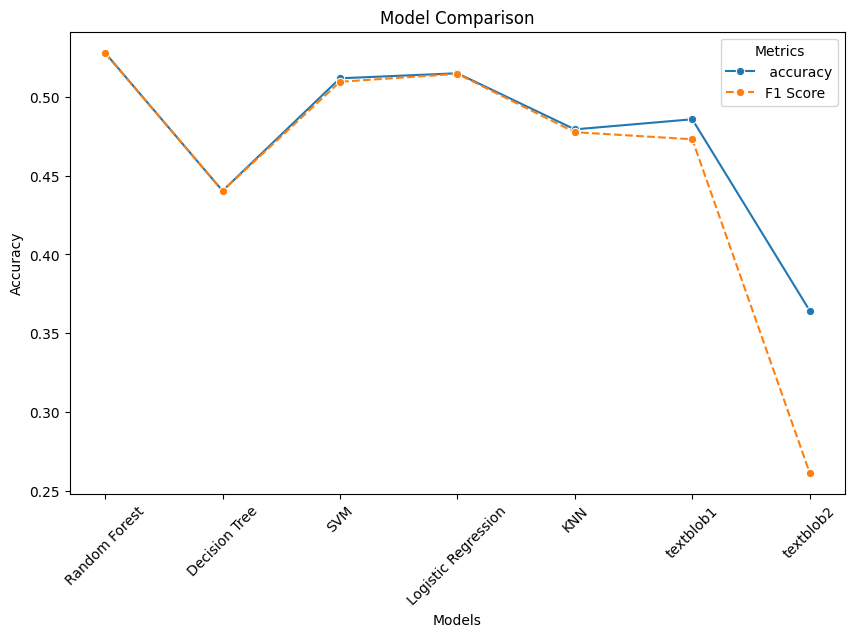

In [9]:
# Visualisation des r√©sultats
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "SVM": svm,
    "Logistic Regression": lr,
    "KNN": knn,
    "textblob1": Blobber,
    "textblob2": TextBlob
}

# Visualisation des r√©sultats
plt.figure(figsize=(10, 6))
# sns.barplot(x=list(models.keys()), y=accuracy)
sns.lineplot(x=list(models.keys()), y=accuracy, marker='o',label=' accuracy')
sns.lineplot(x=list(models.keys()), y=fscores, marker='o', linestyle='--', label='F1 Score')
plt.legend(title='Metrics')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

In [12]:
# le meilleur model
best_model_index = np.argmax(accuracy)
best_model_name = list(models.keys())[best_model_index]
best_model_accuracy = accuracy[best_model_index]
print(f"Best model: {best_model_name} with accuracy: {best_model_accuracy:.4f}")
# le meilleur model
best_fscore_index = np.argmax(fscores)
best_fscore_name = list(models.keys())[best_fscore_index]
best_fscore = fscores[best_fscore_index]
print(f"Best model by F1 Score: {best_fscore_name} with F1 Score: {best_fscore:.4f}")

# save the model
import pickle
with open("../src/utils/bestmodel.pkl", "wb") as f:
    pickle.dump(rf, f)
# import joblib
# joblib.dump(rf, '../src/utils/bestmodel.pkl')
# # save the label encoder
# joblib.dump(label_encoder, 'label_encoder.pkl')
# # save the vectorizer
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# # save the word2vec model
# joblib.dump(model_w2v, 'word2vec_model.pkl')

Best model: Random Forest with accuracy: 0.5280
Best model by F1 Score: Random Forest with F1 Score: 0.5277


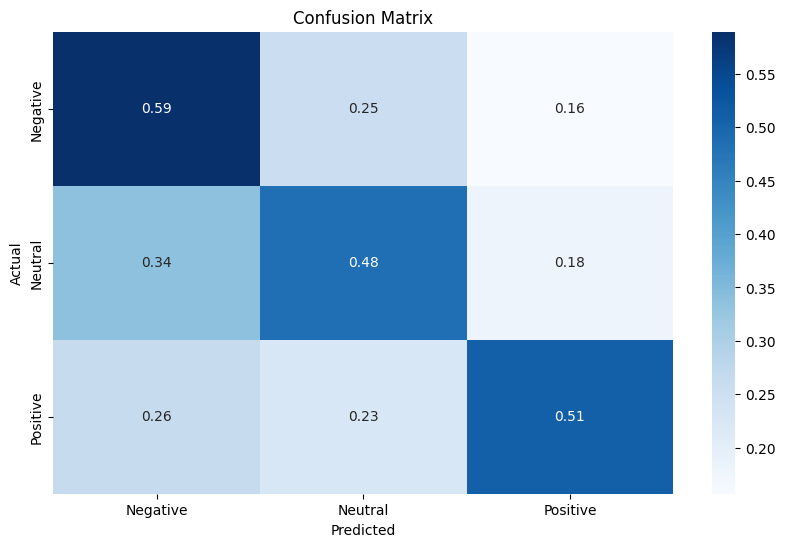

In [13]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_rf,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

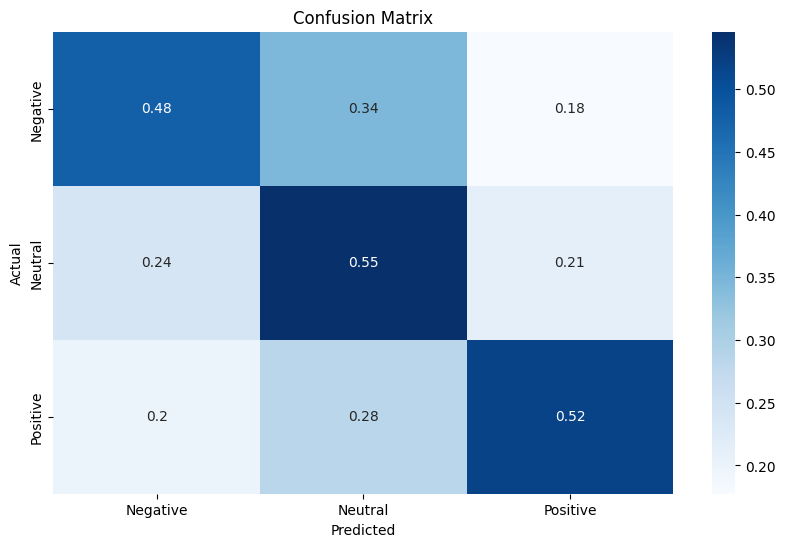

In [18]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_dt,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

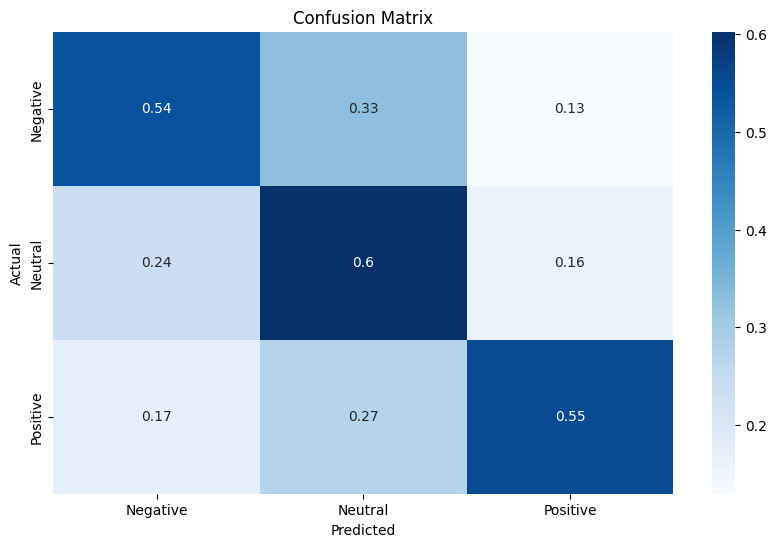

In [19]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_svm,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

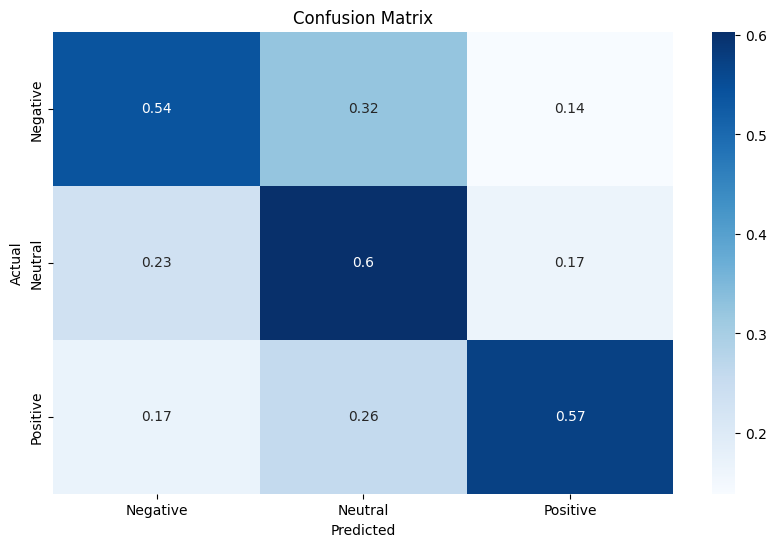

In [20]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_lr,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

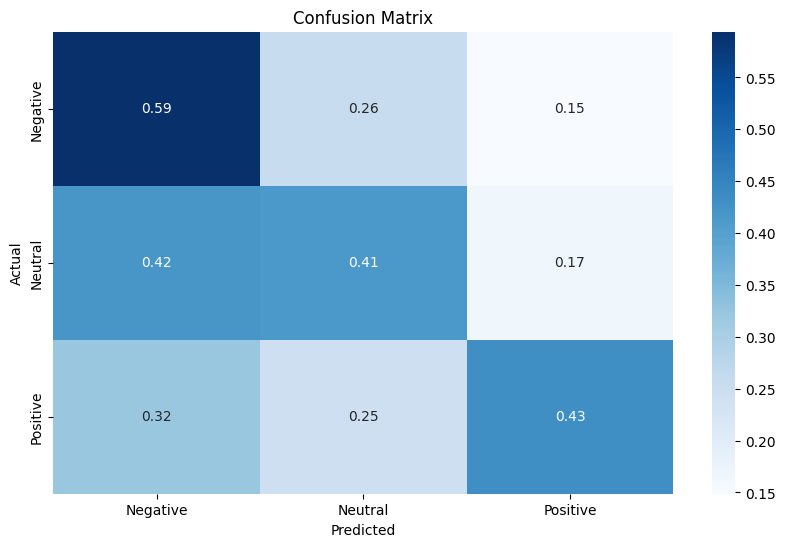

In [21]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_knn,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

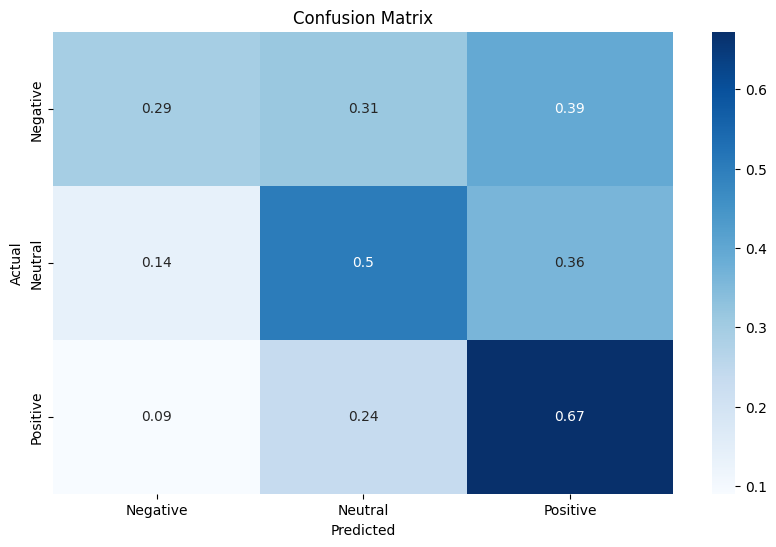

In [22]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_txtb ,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

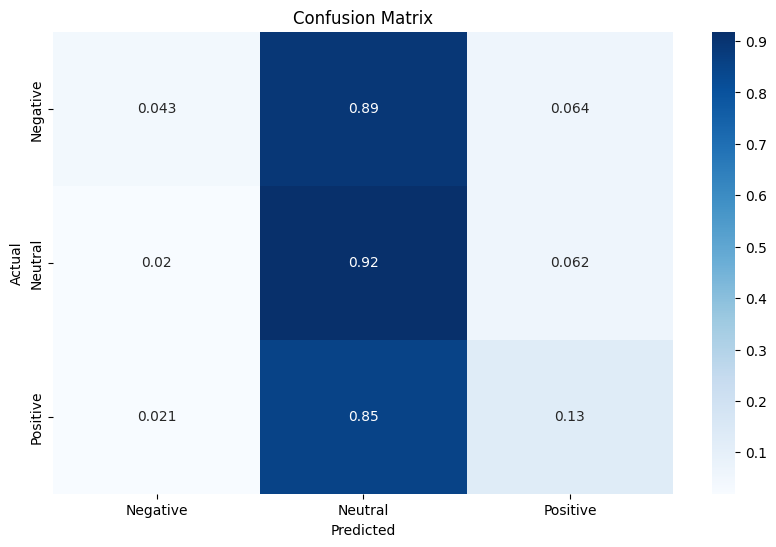

In [23]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_textblob ,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Vader

In [10]:
# import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer(lexicon_file="/Users/carla/Desktop/GitHub/Projet-RNCP/data/vader_lexicon.txt")
analyzer.translate = False
def getSentiment(phrase):
    s = analyzer.polarity_scores(phrase)
    if s['compound'] <= -0.05:
        sentiment = 0
    elif s['compound'] >= 0.05:
        sentiment = 1
    else:
        sentiment = 2
    return sentiment

predictions_vader = []
for text in w_test:
    sentiment =getSentiment(text)
    if sentiment == "positif":
        predictions_vader.append(2) # positive
    elif sentiment == "negatif":
        predictions_vader.append(0)
    elif sentiment == "neutral":
        predictions_vader.append(1)
    else:
        predictions_vader.append(1)

y_pred_vader = np.array(predictions_vader)

print(y_pred_vader)
print("R√âSULTATS vader:")
print(f"Classification Report:\n{classification_report(y_test, y_pred_vader)}")
acc_vader = accuracy_score(y_test, y_pred_vader)
#accuracy.append(acc_vader)
print(f"Accuracy: {acc_vader:.4f}")
fscore_vader = f1_score(y_test, y_pred_vader, average='weighted')
#fscores.append(fscore_vader)
print(f"F1 Score: {fscore_vader:.4f}\n")

HTTPError: HTTP Error 500: Internal Server Error

In [1]:
readSentiment = SentimentIntensityAnalyzer()
# df_train['vader_sentiment'] = df_train['text'].apply(lambda x: readSentiment.polarity_scores(x)['compound'])

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [158]:
def getSentiment(phrase):
    s = readSentiment.polarity_scores(phrase)
    if s['compound'] <= -0.05:
        sentiment = 0
    elif s['compound'] >= 0.05:
        sentiment = 1
    else:
        sentiment = 2
    return sentiment, s

In [162]:
sentiments = ['Negative', 'Positive', 'Neutral']
score=0
for index, row in df_train.iterrows():
    txt = row['text']
    label = row['label']
    pred = readSentiment.polarity_scores(txt)
    sent = sentiments[getSentiment(txt)[0]]
    # print( index,"\n",txt,"\n",label,"\n", pred,"\n",sent,"\n_____________")
    if sent == label:
        score += 1
print("Score: ", score, "/", len(df_sample), "=", score/len(df_sample)*100, "%")

IndexError: list index out of range

In [160]:
sentiments = ['Negative', 'Positive', 'Neutral']
score=0
for index, row in df_fr.iterrows():
    txt = row['text_fr']
    label = row['Sentiment']
    pred = readSentiment.polarity_scores(txt)
    sent = sentiments[getSentiment(txt)[0]]
    # print( index,"\n",txt,"\n",label,"\n", pred,"\n",sent,"\n_____________")
    if sent == label:
        score += 1
print("Score: ", score, "/", len(df_sample), "=", score/len(df_sample)*100, "%")

HTTPError: HTTP Error 500: Internal Server Error

# Text blob

In [22]:

# blob1 = tb(u"Quelle belle matin√©e")
# print(blob1.sentiment)

# blob2 = tb(u"C'est une voiture terribles.")
# print(blob2.sentiment)

# print(blob1.analyzer is blob2.analyzer)


In [23]:
# text raw
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
for i in df['comment'][:10]:
    print(i)
    print(tb(i).sentiment)
    print(tb(i).sentiment[0])  # Affiche la polarit√© entre -1 et 1
    print(tb(i).sentiment[1])  # Affiche la subjectivit√© entre 0 et 1
    vs = tb(i).sentiment[0]
    if (vs > 0):
        print('Positive')
    elif (vs < 0):
        print('Negative')
    else:
        print('Neutral')
    print("\n")

Merci √† Odoo le sponsor cette vid√©o ! Pour d√©couvrir Odoo, clique juste ici : https://www.odoo.com/r/cAlx

Bonne d√©couverte ou red√©couverte √† tous ! (et allez √©couter Childish, c'est important)

bises üôè
(0.31, 0.25000000000000006)
0.31
0.25000000000000006
Positive


Fait une vid√©o sur Tyler the creator stp
(0.0, 0.0)
0.0
0.0
Neutral


Lol le disclaimerüòÇ
(0.0, 0.0)
0.0
0.0
Neutral


o√π peut-on voir la s√©rie "Earn and Alfred" ???
(0.0, 0.0)
0.0
0.0
Neutral


C'est pas un re upload ? Impression de d√©j√† vu (pas une critique foireuse, juste impression de d√©j√† vu de fou)
(0.06999999999999999, 0.6166666666666667)
0.06999999999999999
0.6166666666666667
Positive


fais une vid√©o sur tyler the creator stpppppppp
(0.0, 0.0)
0.0
0.0
Neutral


C est pas SEB c est un robot üòÖüòÖüòÖ
(0.0, 0.0)
0.0
0.0
Neutral


Super vid√©o comme d‚Äôhab, mais je trouve comme souvent que c‚Äôest trop individualiste. Il arrive √† tout faire aussi en grande partie parce que √† chaque fois il es

In [24]:
# # text clean
# tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# for i in df['comment_clean_lem'][:10]:
#     print(i)
#     print(tb(i).sentiment)
#     print(tb(i).sentiment[0])  # Affiche la polarit√© entre -1 et 1
#     print(tb(i).sentiment[1])  # Affiche la subjectivit√© entre 0 et 1
#     vs = tb(i).sentiment[0]
#     if (vs > 0):
#         print('Positive')
#     elif (vs < 0):
#         print('Negative')
#     else:
#         print('Neutral')
#     print("\n")

odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
(0.20000000000000004, 0.18333333333333335)
0.20000000000000004
0.18333333333333335
Positive


video_sur tyler_the_creator
(0.0, 0.0)
0.0
0.0
Neutral


mort_de_rire disclaimer
(0.0, 0.0)
0.0
0.0
Neutral


voir serie earn alfred
(0.0, 0.0)
0.0
0.0
Neutral


reupload impression deja_vu critique foireux impression deja_vu
(0.0, 0.75)
0.0
0.75
Neutral


video_sur tyler_the_creator stp
(0.0, 0.0)
0.0
0.0
Neutral


robot
(0.0, 0.0)
0.0
0.0
Neutral


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
(0.25, 0.6)
0.25
0.6
Positive


coiffure rasage deranger monde contre gresillement sortie fois immersion
(0.0, 0.0)
0.0
0.0
Neutral


super vraiment contre faillir taper tete contre fois prononcer childish
(0.35, 0.7)
0.35
0.7
Positive




In [45]:
# # text clean
# score = 0
# tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# for index, i in enumerate(df_sample['text_fr']):
#     #print(i)
#     #print(tb(i).sentiment)
#     #print(tb(i).sentiment[0])  # Affiche la polarit√© entre -1 et 1
#     #print(tb(i).sentiment[1])  # Affiche la subjectivit√© entre 0 et 1
#     vs = tb(i).sentiment[0]
#     sent = df_sample['Sentiment'].iloc[index]
#     if (vs > 0):
#         #print('Positive')
#         label = 'Positive'
#     elif (vs < 0):
#         #print('Negative')
#         label = 'Negative'
#     else:
#         #print('Neutral')
#         label = 'Neutral'
#     if label == sent:
#         score += 1
#     #print("\n______________________________________________")
# print("Score: ", score, "/", 1000, "=", score/1000*100, "%")

Score:  471 / 1000 = 47.099999999999994 %


# Emotion English DistilRoBERTa-base

In [32]:
from transformers import pipeline
classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base", 
    return_all_scores=True,
    max_length=531)

/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [8]:
def get_sentiment(text : str, classifier, all=False ) -> str:
    res = classifier(text)[0]
    max_result = max(res, key=lambda x: x['score'])
    if all == True :
        return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
    else:
        return max_result['label']

for i in df_fr['text_fr'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")

NameError: name 'df_fr' is not defined

In [33]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")


odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
neutral


video_sur tyler_the_creator
joy


mort_de_rire disclaimer
neutral


voir serie earn alfred
neutral


reupload impression deja_vu critique foireux impression deja_vu
neutral


video_sur tyler_the_creator stp
joy


robot
neutral


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
neutral


coiffure rasage deranger monde contre gresillement sortie fois immersion
neutral


super vraiment contre faillir taper tete contre fois prononcer childish
anger




In [42]:
for index, i in enumerate(df_sample['text_fr']):
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")


Cette vid√©o √©tait assez difficile √† suivre et √† comprendre.
disgust


Aimez votre spectacle et appr√©ciez votre plateforme courageuse. Nous vous remercions.
fear


quel th√®me de couleur utilisez-vous S'il vous pla√Æt me dire
fear


Celui qui s'inqui√®te de tout ce qu'ils ont fait... Mais !!! Si quelqu'un d'autre fait la m√™me chose... alors et alors seulement c'est maintenant un crime !!! . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

RuntimeError: The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]

# distilbert-base-multilingual-cased-sentiments-student

In [ ]:
from transformers import pipeline
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True, max_length=512, 
)
def get_sentiment(text : str, classifier, all=False ) -> str:
    res = classifier(text)[0]
    max_result = max(res, key=lambda x: x['score'])
    if all == True :
        return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
    else:
        return max_result['label']


/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [9]:
for i in range(len(df_yt[:10])):
    text = df_yt['text_fr'].iloc[i]
    label = df_yt['Sentiment'].iloc[i]
    sentiment = get_sentiment(text, classifier=distilled_student_sentiment_classifier)
    print(text)
    print(sentiment)
    print(label)
    print("\n___________________________")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Quelqu'un sait quel film c'est ?
negative
Neutral

___________________________
Le fait qu'ils se retiennent tout en √©tant aussi agressifs .
negative
Positive

___________________________
Vous attendez la prochaine vid√©o ?
negative
Neutral

___________________________
Merci pour la grande vid√©o. Je ne comprends pas pourquoi la DB continue d'√™tre accessible par le port 8080 lorsque la machine locale se connecte au conteneur docker par le port 5432? Ou, pourquoi n'est-il pas possible de faire des requ√™tes GET au port 5432 sur ma machine locale? Est-ce juste parce que le port 5432 est seulement le port utilis√© pour connecter l'application √† la base de donn√©es, mais l'application elle-m√™me est toujours en charge HTTP √† travers 8080?
positive
Neutral

___________________________
C'est comme √ßa qu'on est en Am√©rique, √† l'exception de New York et DC.
negative
Positive

___________________________
Dei l√∏k de seim
negative
Neutral

___________________________
Num√©ro deux parce qu'

In [48]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=distilled_student_sentiment_classifier))
    print("\n")


odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
negative


video_sur tyler_the_creator
positive


mort_de_rire disclaimer
negative


voir serie earn alfred
positive


reupload impression deja_vu critique foireux impression deja_vu
negative


video_sur tyler_the_creator stp
positive


robot
positive


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
positive


coiffure rasage deranger monde contre gresillement sortie fois immersion
negative


super vraiment contre faillir taper tete contre fois prononcer childish
negative




In [52]:
score = 0
for index, i in enumerate(df_sample['text_fr'][:10]):
    #print(i)
    sent = get_sentiment(i, classifier=distilled_student_sentiment_classifier)
    label = df_sample['Sentiment'].iloc[index]
    #print(sent)
    #print("\n")
    if sent == label:
        score += 1
print("Score: ", score, "/", 10, "=", score/10*100, "%")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Score:  0 / 10 = 0.0 %


In [31]:
def get_polarity(text, classifier):
    vs = classifier(text).sentiment[0]
    if (vs > 0):
        return('Positive')
    elif (vs < 0):
        return('Negative')
    else:
        return('Neutral')

In [32]:
df["sentiment_label"] = df["comment"].astype(str).apply(
    lambda x: get_polarity(x, tb) # Polarit√©
)
df.head()

channelId      videoId         author  \
0  UCK3inMNRNAVUleEbpDU1k2g  24Ob5JxhF4s       @SEBFRIT   
1  UCK3inMNRNAVUleEbpDU1k2g  24Ob5JxhF4s   @guishoo4700   
2  UCK3inMNRNAVUleEbpDU1k2g  24Ob5JxhF4s  @Remi-B-Goode   
3  UCK3inMNRNAVUleEbpDU1k2g  24Ob5JxhF4s         @Guaph   
4  UCK3inMNRNAVUleEbpDU1k2g  24Ob5JxhF4s    @rockman156   

                publishedAt  \
0 2025-06-02 19:21:45+00:00   
1 2025-06-30 18:45:12+00:00   
2 2025-06-30 16:35:49+00:00   
3 2025-06-29 20:17:58+00:00   
4 2025-06-29 19:05:12+00:00   

                                             comment         extractedAt  \
0  Merci √† Odoo le sponsor cette vid√©o ! Pour d√©c... 2025-07-01 11:46:10   
1           Fait une vid√©o sur Tyler the creator stp 2025-07-01 11:46:10   
2                                 Lol le disclaimerüòÇ 2025-07-01 11:46:10   
3     o√π peut-on voir la s√©rie "Earn and Alfred" ??? 2025-07-01 11:46:10   
4  C'est pas un re upload ? Impression de d√©j√† vu... 2025-07-01 11:46:10   

                                    tokens_clean_lem  \
0  ['odoo', 'sponsor', 'decouvrir', 'odoo', 'cliq...   
1                 ['video_sur', 'tyler_the_creator']   
2                     ['mort_de_rire', 'disclaimer']   
3                ['voir', 'serie', 'earn', 'alfred']   
4  ['reupload', 'impression', 'deja_vu', 'critiqu...   

                                   comment_clean_lem sentiment_label  
0  odoo sponsor decouvrir odoo clique decouverte ...        Positive  
1                        video_sur tyler_the_creator         Neutral  
2                            mort_de_rire disclaimer         Neutral  
3                             voir serie earn alfred         Neutral  
4  reupload impression deja_vu critique foireux i...        Positive

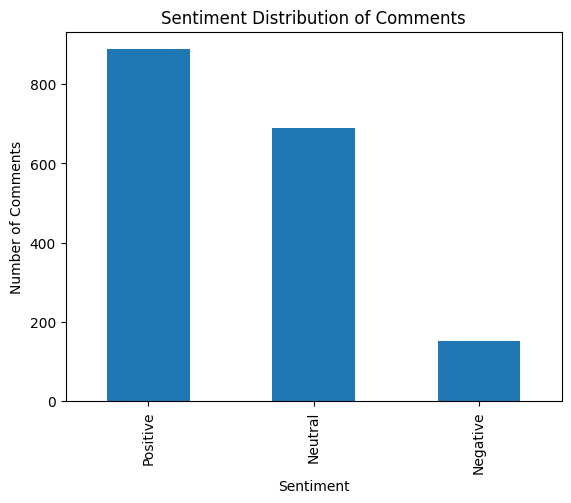

In [33]:
# distribution des commentaires en fonction des sentiments
df["sentiment_label"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments')
plt.show()

# ALLOCINE MODEL

In [2]:
from transformers import pipeline

# Use PyTorch instead of TensorFlow
# classifier = pipeline(
#     "text-classification",
#     model="camembert-base",
#     framework="pt"  # Explicitly specify PyTorch
# )

classifier = pipeline(
    "sentiment-analysis",
    model="tblard/tf-allocine",
    framework="pt"
)


ImportError: 
TFCamembertForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.


In [116]:
! pip install tensorflow
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine",from_tf=True)

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached h5py-3.14.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200.4/200.4 MB 5.2 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

ImportError: 
TFAutoModelForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.


In [11]:
# CamemBERT pour le fran√ßais
from transformers import pipeline

# classifier = pipeline(
#     "sentiment-analysis",
#     model="tblard/tf-allocine",  # Sp√©cialis√© fran√ßais
#     tokenizer="tblard/tf-allocine"
# )

# Ou pour multilingue
classifier = pipeline(
    "sentiment-analysis", 
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


# Ecriture du fichier

In [34]:
df.to_csv('database_sentiment_label.csv', index=False)

In [6]:
from transformers import pipeline

classifier = pipeline(
    "sentiment-analysis", 
    model="cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual"
)

/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0


In [7]:
df_yt['label']= df_yt['text_fr'].apply(lambda x: classifier(x)[0].get('label'))

df_yt

CommentID      VideoID  \
0          UgyRjrEdJIPrf68uND14AaABAg  mcY4M9gjtsI   
1          UgxXxEIySAwnMNw8D7N4AaABAg  2vuXcw9SZbA   
2          UgxB0jh2Ur41mcXr5IB4AaABAg  papg2tsoFzg   
3          UgwMOh95MfK0GuXLLrF4AaABAg  31KTdfRH6nY   
4          UgxJuUe5ysG8OSbABAl4AaABAg  -hV6aeyPHPA   
...                               ...          ...   
24995      UgyhNXeIJU52Tq5k6EV4AaABAg  IEf1KAcK6A8   
24996  Ugwg_ThYp_qokkNGSiN4AaABAg_aug  MModz5jafy0   
24997      UgxTW8JBkQ-DoEfJpnl4AaABAg  RABj7jsRVCM   
24998      UgwMGbs4K6EF4VlZAfV4AaABAg  2jWyuONvW1k   
24999            Ugh3uMEUPtoie3gCoAEC  qIcb_Uh3ciY   

                                              VideoTitle  \
0            They killed my friend.#tales #movie #shorts   
1      Man Utd conceding first penalty at home in yea...   
2                           Welcome to Javascript Course   
3      Building web applications in Java with Spring ...   
4      After a new engine her car dies on her way hom...   
...                                                  ...   
24995  ES6 JavaScript Tutorial for Beginners - Gettin...   
24996                        Bigger isn‚Äôt always better!   
24997  Update from Ukraine |  Wow! Ukraine moves in! ...   
24998  BREAKING NEWS: TOMMY ROBINSON SPEAKS FROM PRIS...   
24999  Jennifer Teege, granddaughter of a Nazi war cr...   

                   AuthorName           AuthorChannelID  \
0             @OneWhoWandered  UC_-UEXaBL1dqqUPGkDll49A   
1               @chiefvon3068  UCZ1LcZESjYqzaQRhjdZJFwg   
2              @Abdulla-ip8qr  UCWBK35w5Swy1iF5xIbEyw3A   
3            @finnianthehuman  UCwQ2Z03nOcMxWozBb_Cv66w   
4      @ryoutubeplaylistb6137  UCTTcJ0tsAKQokmHB2qVb1qQ   
...                       ...                       ...   
24995       @VishalDeepVerma1  UCdMKjjzlm68fwnLhbCROddw   
24996           AugmentedUser              AugmentedCID   
24997               @bill7243  UCD3QddGQrFDpqRCvBvKswIg   
24998        @donnaweetch7589  UCDRNvvjd7gtdSEUz9ESXVlA   
24999       @slonekettering25  UCDlTt5h_dDDIEW_UTHreITA   

                                             CommentText Sentiment  Likes  \
0                        Anyone know what movie this is?   Neutral      0   
1      The fact they're holding each other back while...  Positive      0   
2                            waiting next video will be?   Neutral      1   
3      Thanks for the great video.\n\nI don't underst...   Neutral      0   
4      Good person helping good people.\nThis is how ...  Positive      3   
...                                                  ...       ...    ...   
24995  The best tutorial !! Do't go anywhere, you can...  Positive      0   
24996  Yeah, but the big hammer looks like it has a g...  Negative      0   
24997  Many thanks Dennis, keep up the hope and your ...  Positive     19   
24998  This is disgusting, where are the human rights...  Negative      1   
24999          "an elderly woman . . . . about 40"  wtf!  Negative    788   

       Replies          PublishedAt CountryCode  CategoryID  \
0            2  2025-01-15 00:54:55          NZ           1   
1            0  2025-01-13 23:51:46          AU          17   
2            0  2020-07-06 13:18:16          IN          27   
3            1  2024-09-18 12:04:12          US          27   
4            1  2025-01-10 19:39:03          US           2   
...        ...                  ...         ...         ...   
24995        1  2017-09-11 05:16:30          DE          27   
24996        0  2025-02-04 01:28:18          GB          26   
24997        0  2025-01-12 08:51:04          AU          25   
24998        0  2025-01-10 16:52:58          GB          25   
24999       29  2016-06-03 20:29:05          DE          25   

                                                 text_fr     label  
0                       Quelqu'un sait quel film c'est ?   neutral  
1      Le fait qu'ils se retiennent tout en √©tant aus...  negative  
2                     Vous attendez la prochaine vid√©o ?

In [16]:
predictions_roberta = []
for text in w_test:
    res = classifier(text)[0]
    sentiment =res.get('label')
    if sentiment == "positif":
        predictions_roberta.append(2) # positive
    elif sentiment == "negatif":
        predictions_roberta.append(0)
    elif sentiment == "neutral":
        predictions_roberta.append(1)
    else:
        predictions_roberta.append(1)

y_pred_roberta = np.array(predictions_roberta)

print(y_pred_roberta)
print("R√âSULTATS roberta:")
print(f"Classification Report:\n{classification_report(y_test, y_pred_roberta)}")
acc_roberta = accuracy_score(y_test, y_pred_roberta)
print(f"Accuracy: {acc_roberta:.4f}")
fscore_roberta = f1_score(y_test, y_pred_roberta, average='weighted')
print(f"F1 Score: {fscore_roberta:.4f}\n")

[1 1 1 ... 1 1 1]
R√âSULTATS roberta:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1707
           1       0.34      1.00      0.50      1684
           2       0.00      0.00      0.00      1609

    accuracy                           0.34      5000
   macro avg       0.11      0.33      0.17      5000
weighted avg       0.11      0.34      0.17      5000

Accuracy: 0.3368
F1 Score: 0.1697



/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [18]:
for i, text in enumerate(df_yt['text_fr'][:100]):
    print(text)
    res = classifier(text)[0]
    sentiment =res.get('label')
    label = df_yt['Sentiment'].iloc[i]
    print(label)
    print(sentiment)
    print("____________________________")

Quelqu'un sait quel film c'est ?
Neutral
neutral
____________________________
Le fait qu'ils se retiennent tout en √©tant aussi agressifs .
Positive
negative
____________________________
Vous attendez la prochaine vid√©o ?
Neutral
neutral
____________________________
Merci pour la grande vid√©o. Je ne comprends pas pourquoi la DB continue d'√™tre accessible par le port 8080 lorsque la machine locale se connecte au conteneur docker par le port 5432? Ou, pourquoi n'est-il pas possible de faire des requ√™tes GET au port 5432 sur ma machine locale? Est-ce juste parce que le port 5432 est seulement le port utilis√© pour connecter l'application √† la base de donn√©es, mais l'application elle-m√™me est toujours en charge HTTP √† travers 8080?
Neutral
negative
____________________________
C'est comme √ßa qu'on est en Am√©rique, √† l'exception de New York et DC.
Positive
negative
____________________________
Dei l√∏k de seim
Neutral
neutral
____________________________
Num√©ro deux parce qu'il 

In [15]:
commentaire = "Cette vid√©o est g√©niale, j'ai ador√© !"
resultat = classifier(commentaire)
print(resultat[0].get('label'))

positive
